## Titanic Survival Prediction ##

### Loading Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
titanic_survival=pd.read_csv(filepath_or_buffer="Titanic-Dataset.csv")
titanic_survival

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
counts = titanic_survival["Survived"].value_counts()
counts

Survived
0    549
1    342
Name: count, dtype: int64

#### 549 Passengers died and 342 Passengers survived

### DATA CLEANING

### Find out the null entries

In [3]:
titanic_survival.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Gender wise survival analysis

In [4]:
titanic_survival.groupby(by="Sex")["Survived"].sum()


Sex
female    233
male      109
Name: Survived, dtype: int64

#### Result: Female survived the most

### Passenger Class wise survival analysis

In [5]:
titanic_survival.groupby(by="Pclass")["Survived"].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

#### Result :  Passengers in Pclass 1 survived the most followed by Pclass 3 and then Pclass 2

### Survival rate by SibSp

In [23]:
titanic_survival["SibSp"].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 8])

In [11]:
titanic_survival.groupby("SibSp")["Survived"].agg(total="count",survived="sum",survival_rate="mean")

,total,survived,survival_rate
SibSp,,,
0,608,210,0.345395
1,209,112,0.535885
2,28,13,0.464286
3,16,4,0.250000
4,18,3,0.166667
5,5,0,0.000000
8,7,0,0.000000


##### Result: Groups with higher survival rate values have a higher probability of surviving,regardless of the total number of survivors

### Survival rate by Parch

In [22]:
titanic_survival["Parch"].sort_values().unique()

array([0, 1, 2, 3, 4, 5, 6])

In [13]:
titanic_survival.groupby("Parch")["Survived"].agg(total="count",survived="sum",survival_rate="mean")

,total,survived,survival_rate
Parch,,,
0,678,233,0.343658
1,118,65,0.550847
2,80,40,0.500000
3,5,3,0.600000
4,4,0,0.000000
5,5,1,0.200000
6,1,0,0.000000


#### Result: Passengers travelling with 3,2,1 parents\children have higher chances of survival while solo passengers and large families has lower survival chances

#### Survival analysis by Family Size

In [14]:
titanic_survival["FamilySize"] = titanic_survival["SibSp"] + titanic_survival["Parch"] + 1

In [20]:
titanic_survival["FamilySize"].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 11])

In [15]:
titanic_survival.groupby("FamilySize")["Survived"].agg(total="count",survived="sum",survival_rate="mean")

,total,survived,survival_rate
FamilySize,,,
1,537,163,0.303538
2,161,89,0.552795
3,102,59,0.578431
4,29,21,0.724138
5,15,3,0.200000
6,22,3,0.136364
7,12,4,0.333333
8,6,0,0.000000
11,7,0,0.000000


#### Result: Passengers traveelling in small families(2-4)have higher survival chances while solo travellers and large families has lower survival probability

## Data Visualization

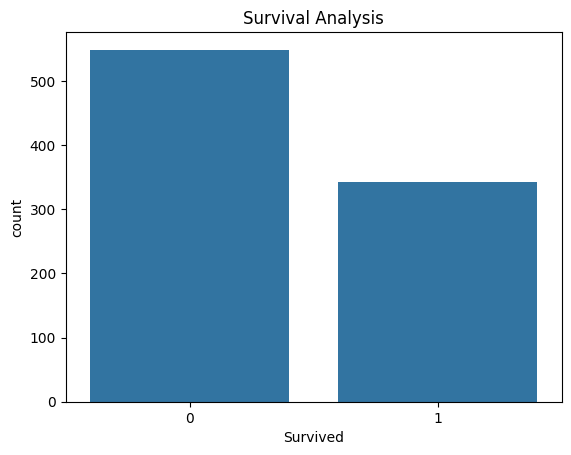

In [17]:
sns.countplot(data=titanic_survival,x="Survived")
plt.title("Survival Analysis")
plt.show()

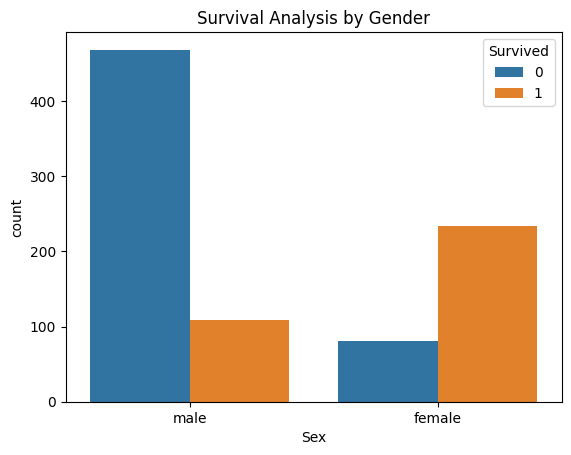

In [22]:
sns.countplot(data=titanic_survival,x="Sex",hue="Survived")
plt.title("Survival Analysis by Gender")
plt.show()

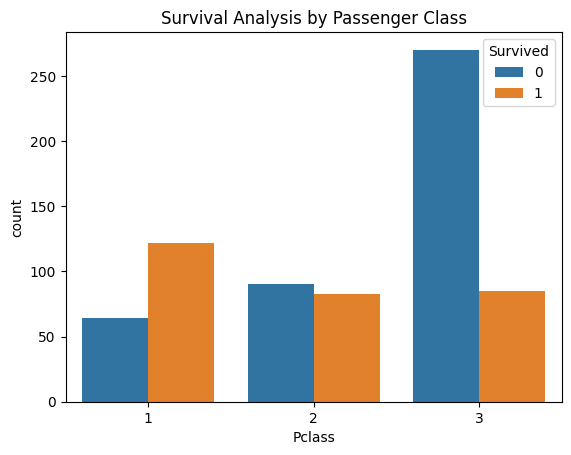

In [64]:
sns.countplot(data=titanic_survival,x="Pclass",hue="Survived")
plt.title("Survival Analysis by Passenger Class")
plt.show()

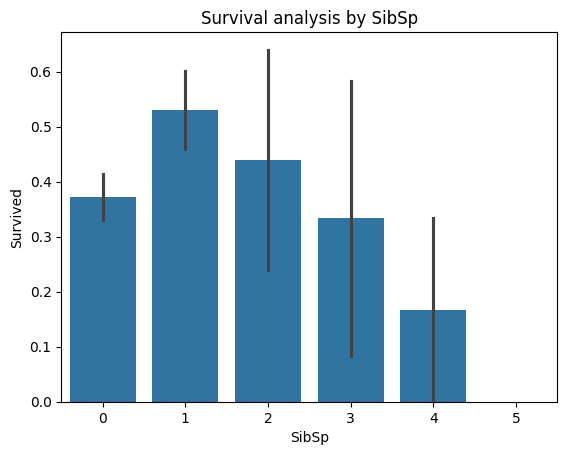

In [43]:
sns.barplot(data=titanic_survival,x="SibSp",y="Survived",estimator="mean")
plt.title("Survival analysis by SibSp")
plt.show()

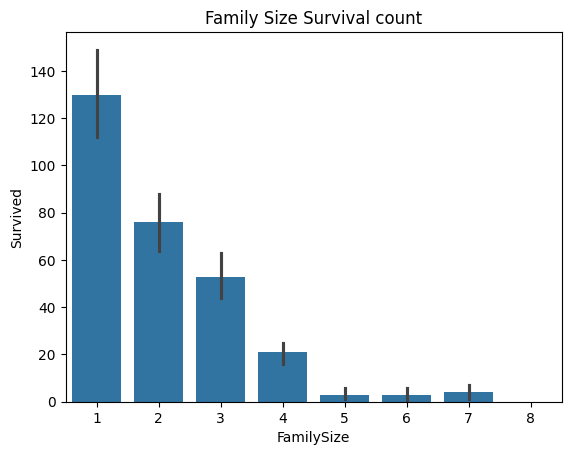

In [44]:
sns.barplot(data=titanic_survival,x="FamilySize",y="Survived",estimator="sum")
plt.title("Family Size Survival count")
plt.show()

#### Remove null entries from age

In [26]:
titanic_survival.dropna(subset=["Age"],inplace=True)


In [27]:
print(titanic_survival["Age"].isna().sum())

0


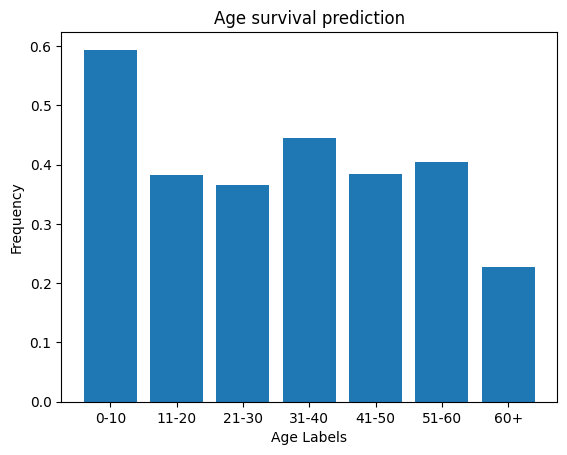

In [31]:
titanic_survival["AgeGroup"] = pd.cut(titanic_survival["Age"],bins=[0,10,20,30,40,50,60,80],labels=['0-10','11-20','21-30','31-40','41-50','51-60','60+'])
survival_rate = titanic_survival.groupby("AgeGroup",observed=False)["Survived"].mean()
plt.xlabel("Age Labels")
plt.ylabel("Frequency")
plt.title("Age survival prediction")
plt.bar(survival_rate.index,survival_rate.values)
plt.show()

In [30]:
titanic_survival.groupby("AgeGroup",observed=False)["Survived"].agg(total="count",survived="sum",survival_rate="mean")

,total,survived,survival_rate
AgeGroup,,,
0-10,64,38,0.593750
11-20,115,44,0.382609
21-30,230,84,0.365217
31-40,155,69,0.445161
41-50,86,33,0.383721
51-60,42,17,0.404762
60+,22,5,0.227273
